In [65]:
import os
import sys
import copy
import json
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from tqdm import tqdm

# Get current working directory and project root directory
cwd = os.getcwd()
rd = os.path.join(cwd.split('stochastic-travel-demand-modelling/', 1)[0])
if not rd.endswith('stochastic-travel-demand-modelling'):
    rd = os.path.join(cwd.split('stochastic-travel-demand-modelling/', 1)[0],'stochastic-travel-demand-modelling')

if rd not in sys.path:
    sys.path.append(rd)

# Import data

In [66]:
constrained = 'singly'

In [104]:
# Import retail data
cost_matrix = np.loadtxt('../data/input/retail/cost_matrix.txt')
origin_supply = np.loadtxt('../data/input/retail/origin_supply.txt')
initial_destination_sizes = np.loadtxt('../data/input/retail/initial_destination_sizes.txt')
rsquared_analysis = np.loadtxt("../cities_and_regions/output/rsquared_analysis.txt")

data = np.loadtxt("../cities_and_regions/data/london_n/shopping_small.txt")
popn = np.loadtxt("../cities_and_regions/data/london_n/popn.txt")
xd = np.loadtxt("../cities_and_regions/data/london_n/xd0.txt")

origin_locs = popn[:, [0, 1]]
destination_locs = data[:, [0, 1]]

mcmc_low_noise_theta_samples_init = np.loadtxt("../cities_and_regions/output/low_noise_samples.txt")
mcmc_low_noise_x_samples_init = np.loadtxt("../cities_and_regions/output/low_noise_samples2.txt")
mcmc_low_noise_sign_samples_init = np.loadtxt("../cities_and_regions/output/low_noise_samples3.txt")

mcmc_high_noise_theta_samples_init = np.loadtxt("../cities_and_regions/output/high_noise_samples.txt")
mcmc_high_noise_x_samples_init = np.loadtxt("../cities_and_regions/output/high_noise_samples2.txt")
mcmc_high_noise_sign_samples_init = np.loadtxt("../cities_and_regions/output/high_noise_samples3.txt")

N,M = cost_matrix.shape

delta = np.min(np.exp(xd))

In [68]:
np.sum(data[:,[2]])

4405709.0

In [69]:
np.sum(origin_supply)

1.0

In [70]:
np.max(rsquared_analysis)

0.9019837895702899

In [78]:
np.min(initial_destination_sizes)

0.00617494255748621

# MCMC initial samples
## Low noise

In [85]:
# Select mcmc start
mcmc_start = 1

In [86]:
theta_min = np.min(mcmc_low_noise_theta_samples_init,axis=0)
theta_max = np.max(mcmc_low_noise_theta_samples_init,axis=0)

print('Theta')
print(f'min = {theta_min}')
print(f'max = {theta_max}')

Theta
min = [1.14301849 0.22233999]
max = [1.20727509 0.29199527]


In [87]:
w_min = np.exp(np.min(mcmc_low_noise_x_samples_init,axis=0))
w_max = np.exp(np.max(mcmc_low_noise_x_samples_init,axis=0))

print('X')
print(f'min = {w_min}')
print(f'max = {w_max}')

X
min = [0.20236861 0.02320989 0.01806903 0.02013347 0.016055   0.02258139
 0.01453172 0.01678071 0.0224074  0.01194123 0.01396338 0.02084862
 0.02213392 0.0132242  0.00674286 0.00724915 0.0119439  0.00763987
 0.00717151 0.00771306 0.00918291 0.00799285 0.00697109 0.00766888
 0.01053843 0.00833604 0.00642163 0.00680825 0.00681838 0.00808389
 0.00839645 0.01186566 0.01305519 0.00772339 0.00692581 0.00540522
 0.01206806 0.01016102 0.00716161 0.00656368 0.00937112 0.00918474
 0.01017619 0.01147082 0.00886922 0.00742381 0.00921476 0.00658478
 0.00693617]
max = [0.2920245  0.04652204 0.031625   0.03883611 0.03062416 0.03993206
 0.02884935 0.03233411 0.03609767 0.02051108 0.02578025 0.03462958
 0.04335924 0.02305386 0.01391606 0.01321997 0.02155474 0.01554249
 0.01501998 0.01332051 0.01710376 0.01595043 0.01349164 0.01522357
 0.0212861  0.01626487 0.01374853 0.01309519 0.0144151  0.01570338
 0.01805315 0.02372065 0.02505875 0.01478598 0.0131841  0.01164949
 0.02293799 0.01916731 0.01482649 0

In [88]:
sign_min = np.min(mcmc_low_noise_sign_samples_init,axis=0)
sign_max = np.max(mcmc_low_noise_sign_samples_init,axis=0)

print('X')
print(f'min = {sign_min}')
print(f'max = {sign_max}')

X
min = 1.0
max = 1.0


In [89]:
# Initialisations 
print('theta')
print(mcmc_low_noise_theta_samples_init[:mcmc_start+1])

print('x')
print(mcmc_low_noise_x_samples_init[:mcmc_start+1])
print('true x')
print(xd)

print('sign')
print(mcmc_low_noise_theta_samples_init[:mcmc_start+1])

theta
[[1.17097421 0.25761399]
 [1.17093182 0.25202934]]
x
[[-1.40985754 -3.09458228 -3.48816872 -3.90537175 -3.7423204  -3.48238964
  -3.79974684 -3.43163245 -3.66894133 -4.25558083 -3.91555429 -3.71324914
  -3.19624656 -4.32570667 -4.52965777 -4.61842047 -3.96934135 -4.53634339
  -4.55682268 -4.53580973 -4.36144747 -4.48172112 -4.58625992 -4.57842881
  -4.31459852 -4.55963463 -4.88689429 -4.7928993  -4.68079439 -4.50104671
  -4.50845557 -4.09284085 -4.02958396 -4.55971097 -4.80377157 -4.85345867
  -4.05864181 -4.38481225 -4.65200123 -4.77735801 -4.45483675 -4.50360075
  -4.22594196 -4.11071436 -4.56539446 -4.62870489 -4.49440255 -4.89290679
  -4.68390095]
 [-1.35773336 -3.06782912 -3.68647877 -3.34043021 -3.93426262 -3.61416109
  -3.79156629 -3.95765908 -3.39120472 -4.26572208 -4.07075878 -3.48844623
  -3.63421524 -3.79427778 -4.74829707 -4.70493891 -4.19225328 -4.54362445
  -4.69042757 -4.67386628 -4.33672761 -4.4728943  -4.65694801 -4.65996815
  -4.43418611 -4.69683698 -4.88115673 

## Visualise X initialisations

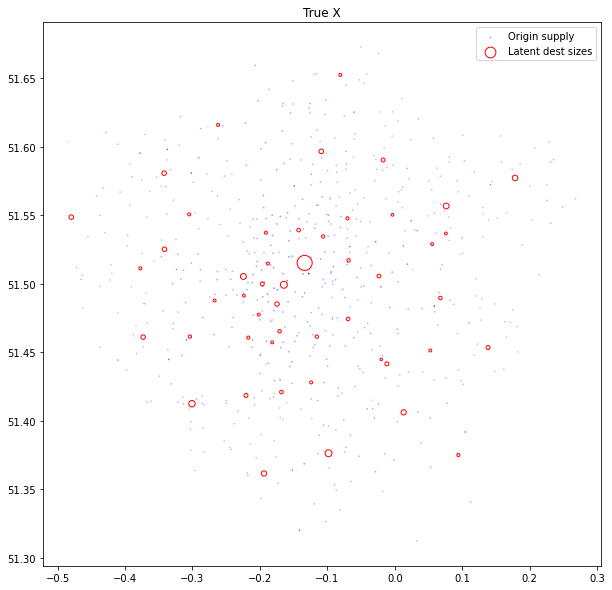

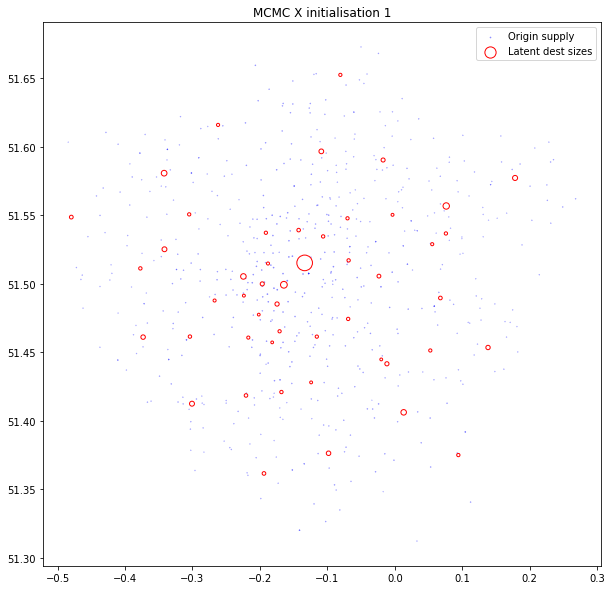

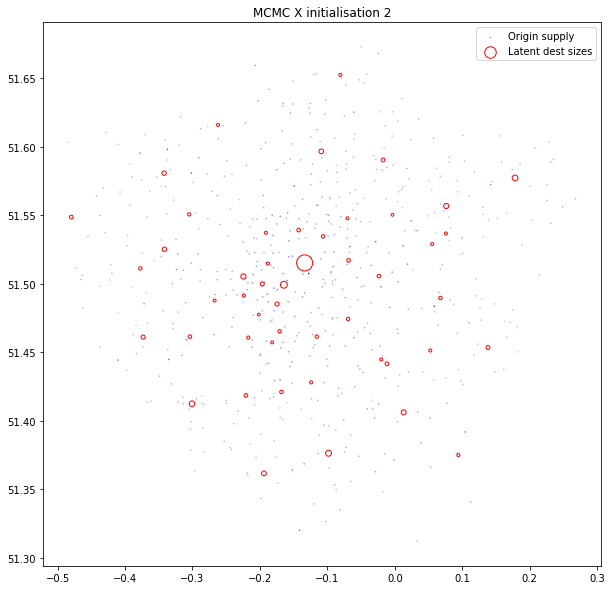

In [90]:
xx1 = mcmc_low_noise_x_samples_init[:mcmc_start+1][0]
xx2 = mcmc_low_noise_x_samples_init[:mcmc_start+1][1]

plt.figure(0,figsize=(10,10))
plt.title("True X")
plt.scatter(origin_locs[:, 1], origin_locs[:, 0], color='w',edgecolors='b',s=100*origin_supply, alpha=0.5,label='Origin supply')
plt.scatter(destination_locs[:, 1], destination_locs[:, 0], color='w',edgecolors='r', s=1000*np.exp(xd),label='Latent dest sizes')
plt.legend()

plt.figure(1,figsize=(10,10))
plt.title("MCMC X initialisation 1")
plt.scatter(origin_locs[:, 1], origin_locs[:, 0], color='w',edgecolors='b',s=100*origin_supply, alpha=0.5,label='Origin supply')
plt.scatter(destination_locs[:, 1], destination_locs[:, 0], color='w',edgecolors='r', s=1000*np.exp(xx1),label='Latent dest sizes')
plt.legend()

plt.figure(2,figsize=(10,10))
plt.title("MCMC X initialisation 2")
plt.scatter(origin_locs[:, 1], origin_locs[:, 0], color='w',edgecolors='b',s=100*origin_supply, alpha=0.5,label='Origin supply')
plt.scatter(destination_locs[:, 1], destination_locs[:, 0], color='w',edgecolors='r', s=1000*np.exp(xx2),label='Latent dest sizes')
plt.legend()

## High noise

In [91]:
# Select mcmc start
mcmc_start = 10000

In [93]:
# Import Laplace optimal for high noise regime
with open(f'../data/output/retail/laplace/figures/{constrained}_laplace_analysis_gamma_100_parameters.json') as json_file:
    laplace_high_noise_opt_params = json.load(json_file)
    
alpha_opt = laplace_high_noise_opt_params['fitted_alpha']
beta_opt = laplace_high_noise_opt_params['fitted_scaled_beta']

print('alpha = ',alpha_opt,' beta = ',beta_opt)

alpha =  0.9  beta =  0.44


In [94]:
theta_min = np.min(mcmc_high_noise_theta_samples_init[:mcmc_start+1],axis=0)
theta_max = np.max(mcmc_high_noise_theta_samples_init[:mcmc_start+1],axis=0)
theta_mean = np.mean(mcmc_high_noise_theta_samples_init[:mcmc_start+1],axis=0)

print('Theta')
print(f'min = {theta_min}')
print(f'max = {theta_max}')
print(f'mean = {theta_mean}')
print(f'initial = {mcmc_high_noise_theta_samples_init[mcmc_start]}')

Theta
min = [0.00012304 0.00309509]
max = [1.99572883 1.99978564]
mean = [0.44971714 1.07697206]
initial = [0.80559407 1.3256266 ]


In [96]:
w_min = np.exp(np.min(mcmc_high_noise_x_samples_init,axis=0))
w_max = np.exp(np.max(mcmc_high_noise_x_samples_init,axis=0))

print('X')
print(f'min = {w_min}')
print(f'max = {w_max}')

X
min = [0.13211871 0.0312635  0.01811604 0.03259764 0.01292458 0.02391923
 0.01495846 0.01404828 0.02032237 0.01328183 0.01303821 0.02800019
 0.0216646  0.01872564 0.00518055 0.00623687 0.01021743 0.00633026
 0.00639565 0.00599274 0.00906814 0.00614914 0.00630418 0.005769
 0.00797353 0.00681986 0.00567402 0.00502316 0.00600319 0.00734764
 0.00788788 0.01059206 0.0131288  0.00793823 0.00611551 0.0042321
 0.01028214 0.0102863  0.00583727 0.00495913 0.00734526 0.00881522
 0.00929372 0.01081862 0.00797164 0.00648909 0.00889923 0.00530855
 0.00565312]
max = [0.29292454 0.08246185 0.04327237 0.0738683  0.03111739 0.05056298
 0.03188047 0.02999866 0.0440603  0.0317088  0.02861042 0.06272995
 0.04946849 0.04089231 0.01232539 0.01340648 0.02321926 0.01462761
 0.01326829 0.01400977 0.01864207 0.01383252 0.01420177 0.01282041
 0.0189705  0.01581413 0.01215735 0.01235577 0.01305362 0.01565111
 0.01683775 0.02302213 0.02937399 0.01745348 0.01287221 0.00939215
 0.02346347 0.02283377 0.01245011 0.01

In [97]:
sign_min = np.min(mcmc_high_noise_sign_samples_init,axis=0)
sign_max = np.max(mcmc_high_noise_sign_samples_init,axis=0)

print('X')
print(f'min = {sign_min}')
print(f'max = {sign_max}')

X
min = -1.0
max = 1.0


In [112]:
# Initialisations 
print('theta')
print(mcmc_high_noise_theta_samples_init[mcmc_start])

print('x')
print(mcmc_high_noise_x_samples_init[mcmc_start])
print('true x')
print(xd)

theta
[0.80559407 1.3256266 ]
x
[-1.54978513 -2.85979709 -3.68803163 -3.16654447 -3.78508629 -3.47685786
 -3.75351336 -3.83097468 -3.49223374 -3.99034077 -3.97075263 -3.17169465
 -3.28575879 -3.51291831 -4.74237918 -4.75390314 -4.23693284 -4.78363312
 -4.67910919 -4.77796943 -4.3582827  -4.77696291 -4.67115698 -4.75361927
 -4.31932983 -4.62942587 -4.6668435  -4.78334789 -4.70379904 -4.64469
 -4.46424076 -4.05202993 -3.91495654 -4.53229587 -4.63810602 -5.27154259
 -4.0984798  -4.12893253 -4.90506314 -4.9763746  -4.7115091  -4.46840667
 -4.29581322 -4.20205655 -4.60237697 -4.57228272 -4.4579995  -4.82376312
 -4.6952996 ]
true x
[-1.48623058 -3.03561986 -3.58171342 -3.03525569 -3.87291895 -3.34915369
 -3.82990594 -3.90168635 -3.48825664 -3.87325777 -3.92661348 -3.17789396
 -3.40539764 -3.57490902 -4.86212472 -4.70632978 -4.17330661 -4.68831218
 -4.71656632 -4.68358147 -4.35330522 -4.67804156 -4.66047408 -4.76948955
 -4.43912399 -4.6066787  -4.8085742  -4.84311755 -4.74705539 -4.53253984
 

## Visualise X initialisations

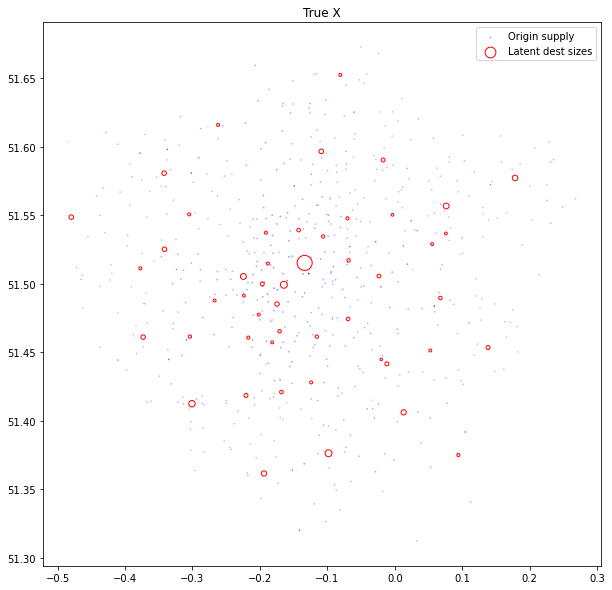

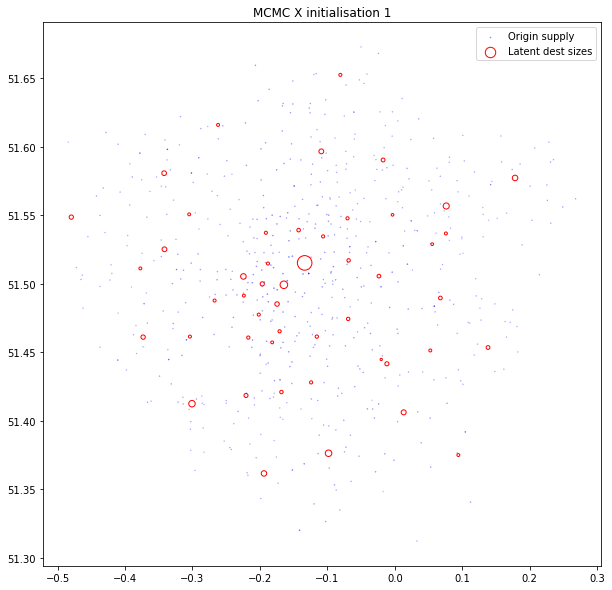

In [115]:
xx = mcmc_high_noise_x_samples_init[mcmc_start]

plt.figure(0,figsize=(10,10))
plt.title("True X")
plt.scatter(origin_locs[:, 1], origin_locs[:, 0], color='w',edgecolors='b',s=100*origin_supply, alpha=0.5,label='Origin supply')
plt.scatter(destination_locs[:, 1], destination_locs[:, 0], color='w',edgecolors='r', s=1000*np.exp(xd),label='Latent dest sizes')
plt.legend()

plt.figure(1,figsize=(10,10))
plt.title("MCMC X initialisation 1")
plt.scatter(origin_locs[:, 1], origin_locs[:, 0], color='w',edgecolors='b',s=100*origin_supply, alpha=0.5,label='Origin supply')
plt.scatter(destination_locs[:, 1], destination_locs[:, 0], color='w',edgecolors='r', s=1000*np.exp(xx),label='Latent dest sizes')
plt.legend()

# MCMC samples

## Low noise

In [ ]:
samples = np.loadtxt(os.path.join(rd,f"data/output/retail/inverse_problem/{constrained}_low_noise_theta_samples.txt"))
samples2 = np.loadtxt(os.path.join(rd,f"data/output/retail/inverse_problem/{constrained}_low_noise_logsize_samples.txt"))
samples3 = np.loadtxt(os.path.join(rd,f"data/output/retail/inverse_problem/{constrained}_low_noise_sign_samples.txt"))


In [ ]:
np.mean(samples,axis=0)

In [ ]:
posterior_xd = np.mean(samples2,axis=0)

In [ ]:
np.exp(posterior_xd)

In [ ]:
np.exp(xd)

In [ ]:
plt.scatter(posterior_xd,xd)

In [ ]:
np.corrcoef(posterior_xd,xd)[0,1]

In [ ]:
plt.hist(samples)

In [ ]:
sm.graphics.tsa.plot_acf(samples[:,0], lags=50)
plt.show()

In [ ]:
sm.graphics.tsa.plot_acf(samples[:,1], lags=50)
plt.show()

# High noise

In [46]:
np.mean(mcmc_high_noise_theta_samples_init,axis=0)

array([0.45206115, 1.06741012])

In [ ]:
posterior_xd = np.mean(mcmc_high_noise_x_samples_init,axis=0)

In [ ]:
np.exp(posterior_xd)

In [ ]:
np.exp(xd)

In [ ]:
plt.scatter(posterior_xd,xd)

In [ ]:
np.corrcoef(posterior_xd,xd)[0,1]

In [ ]:
plt.hist(mcmc_high_noise_theta_samples_init,bins=100)

In [ ]:
mcmc_high_noise_x_samples_init.shape

In [ ]:
sm.graphics.tsa.plot_acf(mcmc_high_noise_theta_samples_init[:,0], lags=50)
plt.show()

In [ ]:
sm.graphics.tsa.plot_acf(mcmc_high_noise_x_samples_init[:,1], lags=50)
plt.show()

# Retail data

## Import retail data

In [ ]:
data = np.loadtxt("../cities_and_regions/data/london_n/shopping_small.txt")
popn = np.loadtxt("../cities_and_regions/data/london_n/popn.txt")
retail_wd0 = np.exp(np.loadtxt("../cities_and_regions/data/london_n/xd0.txt"))
retail_orig_supply = popn[:, 2]/popn[:, 2].sum()
ret_locs = data[:, [0, 1]]
res_locs = popn[:, [0, 1]]

## Plot retail data

In [ ]:
# Set plot params
latent_factor = 1000
actual_factor = 10000

In [ ]:
plt.figure(figsize=(20,20))
plt.scatter(ret_locs[:, 1], ret_locs[:, 0], facecolor="None",edgecolors='b', s=actual_factor*retail_wd0, alpha=1,label='Dest sizes')
plt.scatter(res_locs[:, 1], res_locs[:, 0], facecolor="None",edgecolors='g', s=actual_factor*retail_orig_supply, alpha=1,label='Orig supply')
# Plot legend.
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]